In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

# Assignment 4 - Classification

For this assignment, you'll need to perform a classification on a dataset, as well as do some prep work on the data. 

The exact steps of what you need to do are flexible and up to you to some degree, however you should consider some of the important things we've mentioned recently, such as:
<ul>
<li> Is the target balanced?
<li> Are there missing or erroneous values?
<li> Are there categorical or numerical features?
<li> Is there colinearity?
<li> Are there outliers?
<li> Should we normalize? 
<li> Do the distributions of the features give any indication that some may need work? 
</ul>

Basically, the data is in the original, potentially dirty, format, and you need to find what should be cleaned, and do the cleaning. There is not one "right" answer to what has to be done, and you'll probably need to do it with at least something of an iterative process - find an issue, correct it, check the data, repeat.

<b>The target that we are predicting is the loan_status. </b>

## Grading

The grades will be broken down as follows:
<ul>
<li> <b>30%</b> - a working predictive model with a reasonable level of accuracy. 
    <ul>
    <li> For the accuracy part, it will not be explicitly graded, but compared to all the others. If you're in the same general range, that's good - if yours is drastically less accurate (or, I guess more accurate), then I'll adjust. There won't be a comparison of "this person is 72.3% and this person is only 71.8% accurate, they fail."
    <li> This data is larger than most of the small sample sets, so random variations due to train-test splits shouldn't be too bad. (If you're a keener you could loop)
    <li> I will use the F1 score as the accuracy metric. 
    </ul>
<li> <b>40%</b> - a clear and readable description of what steps you took to prepare the data, and a brief not on the rationale behind it. Did you do a log transformation to a skewed feature, did you remove outliers, did you remove a feature that has a lot of missing values? Please put this somewhere obvious and readable, consider the goal of the assignment to explain your process to me. 
    <ul>
    <li> E.g. "The target data was imbalanced, so I tried several resampling methods and chose the one with the highest accuracy of the resulting model", "the feature X had the same value for 95% of records, so I dropped it". 
    <li> In this, please also state if you see a group that appears to be a good credit risk, and a group that is a bad credit risk, and indicate the evidence showing that. Please do this other than the most simplistic way - more money = better credit. If there are no such groups, state why you think this. This will likely be about 3 - 5 statements or points, you should provide evidence from the data, but it does not need to be an essay. (You may want to consider this question after you're pretty much done with the data prep and modelling.)
    </ul>
<li> <b>30%</b> - allowing your model to be "deployed". At the bottom of this file there is a small block of code to load in some test data (that I have), and calculate your accuracy. Your contribution to this part is to have a model that is ready to make predictions. Some specifics to consider:
    <ul>
    <li> The test data will be in exactly the same format as the dataset you're given. So any steps that you took to prepare your data for modelling will need to be mirroed here, so the new  data can be predicted. The easiest way to do this is to use a pipeline, but it is up to you. Remember the model only accepts data that is in a certain format - the one that you had the data in when it was trained, so when making predictions you need to make sure that is true. 
    <li> Since I'm providing test data, and your task is to just create a model, think about how that might impact your train-test splitting, both as you're developing and for the final product. 
    <li> Once the model is trained it should predict any data that is in the right format, so I should be able to provide any proper dataset, click run on that testing cell, and get predictions. I will not be doing anything that will purposefully make this harder or trickier, like including data that has errors or is in the wrong format, I just split the entire set of data, reserved part of it to test accuracy, and gave the rest to you. Things that you've changed (e.g. dropping a column, one-hot encoding) do need to be replicated at some point before the model can accept the new data to predict. In general we <b>do</b> want to check in our processing that our input is valid, this is kind of a junior introduction to that. 
    </ul>
</ul

## Load Credit Data

In [149]:
#df = pd.read_csv("train.csv")
#df= pd.read_csv("credit-risk_dataset.csv")

# mytest_assign4 is the test data set

df=pd.read_csv("mytest_assign4.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Accuracy Test

Replace the green part with whatever you need to transform the fresh data into the format needed for your model to predict. 

<b>Note:</b> you could test and make sure that things are working OK here by taking part of your dataset, saving it in a separate CSV, and running it through here as a piece of test data. The accuracy results would be useless, but you'd confirm that the model works properly. 

In [150]:
#Get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  509 non-null    int64  
 1   person_income               509 non-null    int64  
 2   person_home_ownership       509 non-null    object 
 3   person_emp_length           502 non-null    float64
 4   loan_intent                 509 non-null    object 
 5   loan_grade                  509 non-null    object 
 6   loan_amnt                   509 non-null    int64  
 7   loan_int_rate               456 non-null    float64
 8   loan_status                 509 non-null    int64  
 9   loan_percent_income         509 non-null    float64
 10  cb_person_default_on_file   509 non-null    object 
 11  cb_person_cred_hist_length  509 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 47.8+ KB


In [151]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Collinearity between Loan_amnt and Loan_percent_income

In [152]:
df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3


In [153]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

C:\Users\shikh\AppData\Local\Temp\ipykernel_24740\527883699.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.00,0.17,-0.01,-0.05,0.02,-0.11,-0.13,-0.03
person_income,0.17,1.00,0.09,0.25,0.02,-0.63,-0.65,0.01
person_emp_length,-0.01,0.09,1.00,0.11,-0.03,-0.05,0.00,0.00
loan_amnt,-0.05,0.25,0.11,1.00,0.20,0.06,0.38,-0.03
loan_int_rate,0.02,0.02,-0.03,0.20,1.00,0.20,0.11,-0.06
loan_status,-0.11,-0.63,-0.05,0.06,0.20,1.00,0.71,-0.06
loan_percent_income,-0.13,-0.65,0.00,0.38,0.11,0.71,1.00,-0.05
cb_person_cred_hist_length,-0.03,0.01,0.00,-0.03,-0.06,-0.06,-0.05,1.00


loan_percent_income and loan_amnt have high correlation

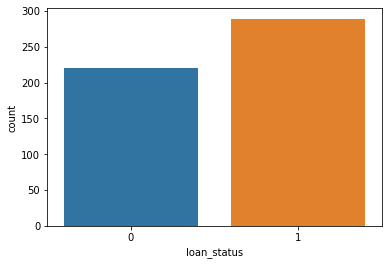

In [154]:
sns.countplot(x = "loan_status", data = df)
plt.show()

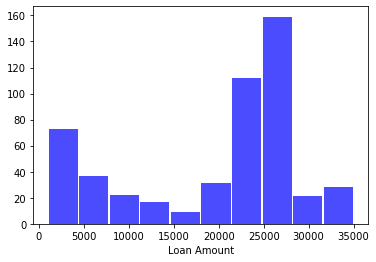

In [155]:
#Distribution of Loan Amounts

n, bins, patches = plt.hist(x = df["loan_amnt"], bins = "auto", color = "blue", alpha = 0.7, rwidth = 0.95)
plt.xlabel("Loan Amount")
plt.show()

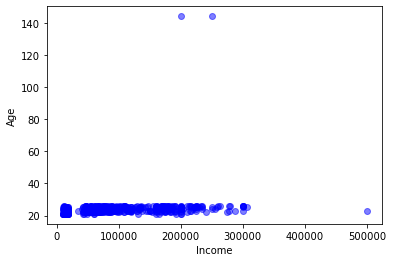

In [156]:
#Scatter plot of Income Against Age
plt.scatter(df["person_income"], df["person_age"], c = "blue", alpha = 0.5)
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

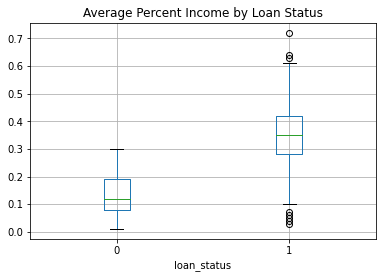

In [157]:
#Box plot of the percentage income by loan status
df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()


Gathering the variables according to their data type.

In [158]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car,num_but_cat
cat_cols, num_cols, cat_but_car,num_but_cat =grab_col_names(df)

Observations: 509
Variables: 12
cat_cols: 7
num_cols: 5
cat_but_car: 0
num_but_cat: 3


In [159]:
num_but_cat
#Its the dependent variable 

['person_age', 'loan_status', 'cb_person_cred_hist_length']

In [160]:
#Categorical data
cat_cols


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'person_age',
 'loan_status',
 'cb_person_cred_hist_length']

 Above are categorical variables

In [161]:
#numberical data
num_cols

['person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']

Above are numerical variables.

In [162]:
#Grouping the mean of the numerical variables according to the credit default

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
for col in num_cols:
    target_summary_with_num(df, "loan_status",col)

             person_income
loan_status               
0            154823.954545
1             60623.557093


             person_emp_length
loan_status                   
0                     5.184332
1                     4.347368


                loan_amnt
loan_status              
0            18617.159091
1            19859.861592


             loan_int_rate
loan_status               
0                11.711040
1                13.031535


             loan_percent_income
loan_status                     
0                       0.139545
1                       0.348304




Outliers:

In [163]:
#Defining outliers
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))
#person_age, person_income and person_emp_lenght have some outlier observations

person_income False
person_emp_length True
loan_amnt False
loan_int_rate False
loan_percent_income False


In [164]:
outlier_thresholds(df, num_cols)

(person_income         -422964.00000
 person_emp_length         -15.00000
 loan_amnt              -49000.00000
 loan_int_rate             -14.74975
 loan_percent_income        -0.85800
 dtype: float64,
 person_income          733778.40000
 person_emp_length          25.00000
 loan_amnt               85400.00000
 loan_int_rate              40.55625
 loan_percent_income         1.45880
 dtype: float64)

In [165]:
df[df["person_age"] > 93].index

Int64Index([81, 183], dtype='int64')

In [166]:
#Replacing Outliers

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

#Check
for col in num_cols:
    print(col, check_outlier(df, col))

person_income False
person_emp_length False
loan_amnt False
loan_int_rate False
loan_percent_income False


Missing values:

In [167]:
df.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              7
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                 53
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
dtype: int64

In [168]:
(714 + 2489) / len(df)
# We have null values in 2 numeric variabels and they are 12% percent of our dataset.
# We need to fill them because we can't lose 12%  of the   data.
# We can fill them with median, mean and KNN Imputer. Fill them with median.

6.292730844793713

Checking for any missing values:

In [169]:
df["person_emp_length"].fillna((df["person_emp_length"].median()), inplace = True)
df["loan_int_rate"].fillna((df["loan_int_rate"].mean()), inplace = True)
#check
df["loan_int_rate"].isnull().sum()


0

Above shows that Now there are no missing values in our data.

In [170]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,25.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [171]:
#df = df.drop(columns="Unnamed: 0")

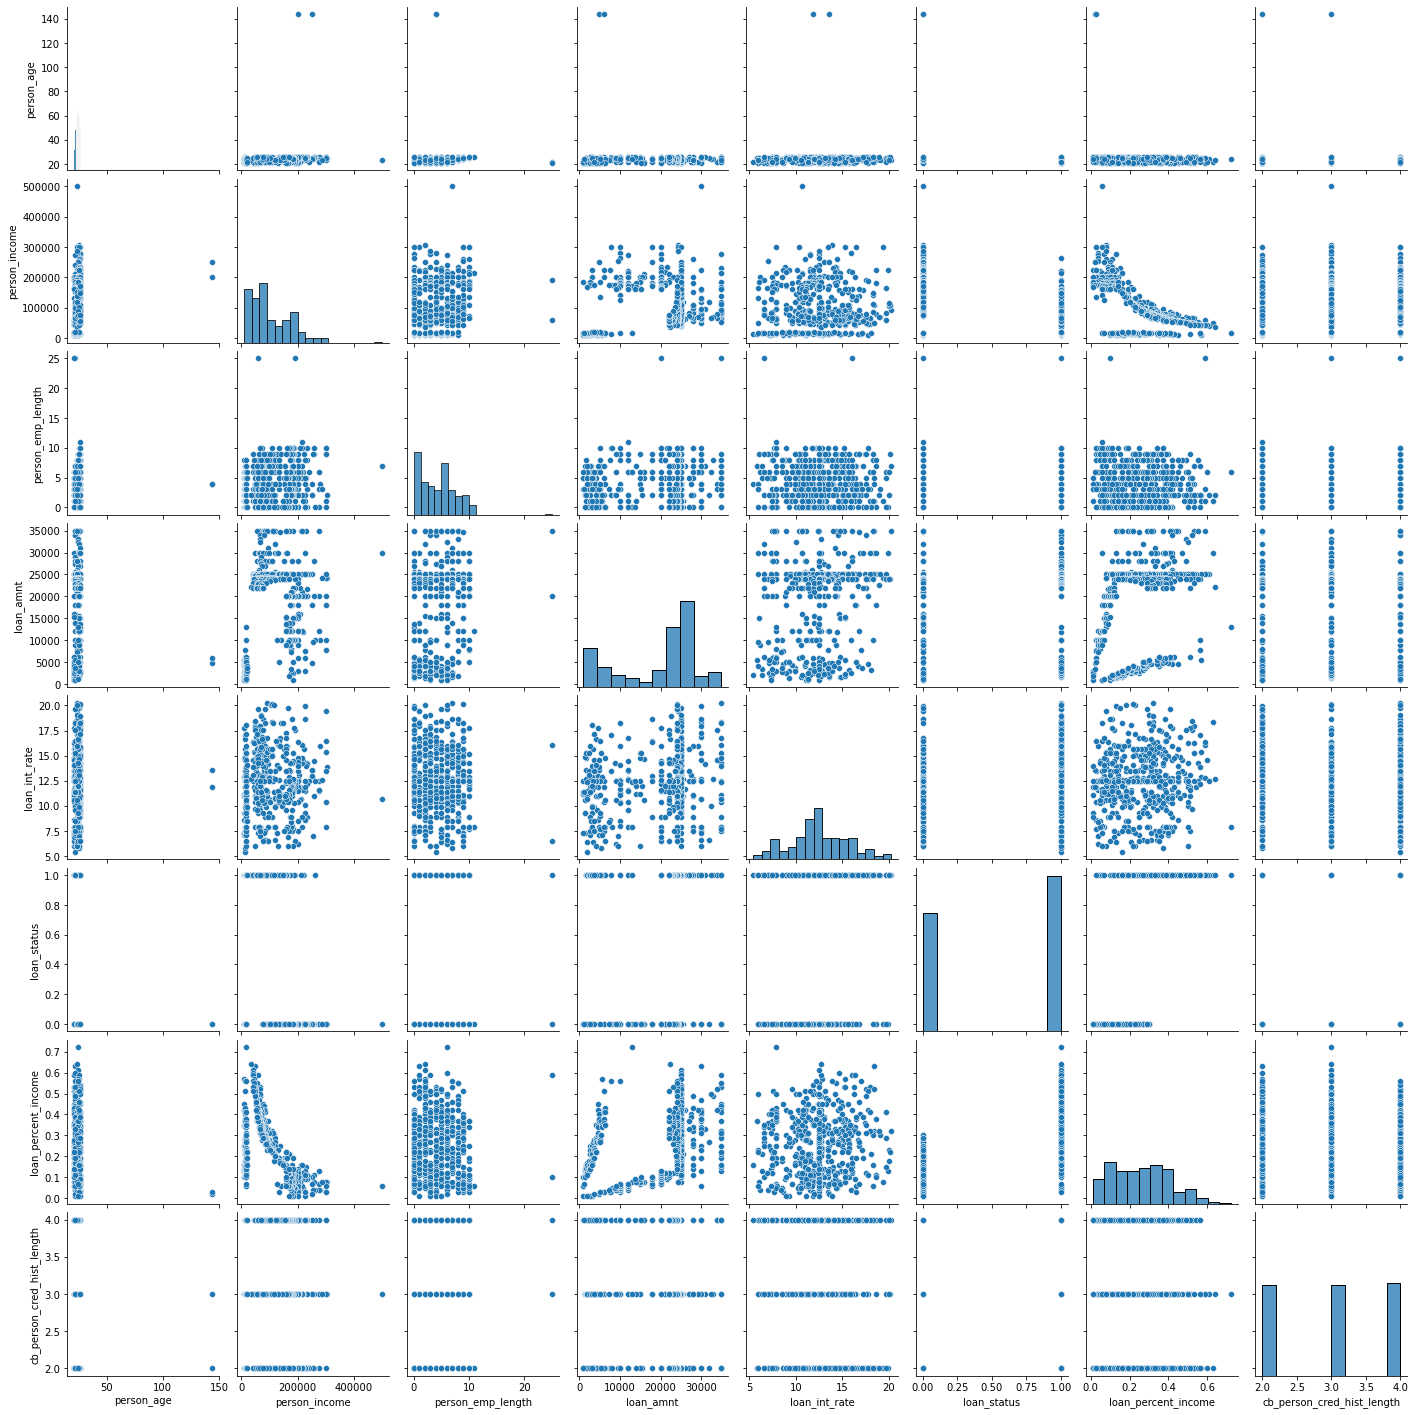

In [172]:
sns.pairplot(df)

Rare Analysing & One-Hot Encoding
 With one-hot, we convert each categorical value into a new categorical column 

In [173]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
rare_analyser(df, "loan_status", cat_cols)

#One Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() >= 2 and col not in "loan_status"]
credit_new2 = one_hot_encoder(df, ohe_cols,drop_first=True)

credit_new2.columns

person_home_ownership : 4
          COUNT     RATIO  TARGET_MEAN
MORTGAGE    117  0.229862     0.282051
OTHER         1  0.001965     1.000000
OWN          84  0.165029     0.619048
RENT        307  0.603143     0.661238


loan_intent : 6
                   COUNT     RATIO  TARGET_MEAN
DEBTCONSOLIDATION     80  0.157171     0.712500
EDUCATION            111  0.218075     0.513514
HOMEIMPROVEMENT       56  0.110020     0.625000
MEDICAL               77  0.151277     0.623377
PERSONAL              89  0.174853     0.505618
VENTURE               96  0.188605     0.489583


loan_grade : 7
   COUNT     RATIO  TARGET_MEAN
A     90  0.176817     0.500000
B    175  0.343811     0.457143
C     98  0.192534     0.489796
D     91  0.178782     0.780220
E     35  0.068762     0.828571
F     17  0.033399     0.764706
G      3  0.005894     1.000000


cb_person_default_on_file : 2
   COUNT    RATIO  TARGET_MEAN
N    386  0.75835     0.533679
Y    123  0.24165     0.674797


person_age : 7
     COUNT

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'person_age_22', 'person_age_23',
       'person_age_24', 'person_age_25', 'person_age_26', 'person_age_144',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y',
       'cb_person_cred_hist_length_3', 'cb_person_cred_hist_length_4'],
      dtype='object')

Creating the Model
Logistic Regression

In [174]:
#Multivariate Logistic Regression

y = credit_new2["loan_status"]
X = credit_new2.drop(["loan_status"], axis=1)

#Model
logit = LogisticRegression().fit(X,y)

In [175]:
logit.coef_

array([[-3.89781020e-05,  1.64227769e-02,  1.01263633e-04,
         1.47316309e-01,  3.61791216e-03,  3.15656559e-03,
         1.97264541e-03, -5.80719305e-04,  8.52429578e-05,
         1.58769381e-03, -8.90854697e-07,  1.61646485e-04,
         6.47396478e-03, -2.22304977e-03,  8.76078040e-04,
         2.44714415e-03,  2.37504529e-03, -1.66414588e-03,
         2.07620492e-04, -1.72871191e-03,  5.80082138e-04,
         4.71274329e-03,  2.51083114e-03,  1.39925919e-03,
         5.24135939e-04,  4.83340885e-03,  3.17865561e-03,
         1.35369630e-03]])

In [176]:
#Predictions
y_pred = logit.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

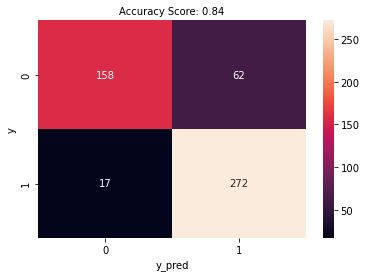

In [177]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [178]:
#Model Validation: Holdout
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 112224)

In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize

In [180]:
df["loan_status"].value_counts()

1    289
0    220
Name: loan_status, dtype: int64

In [181]:
import math

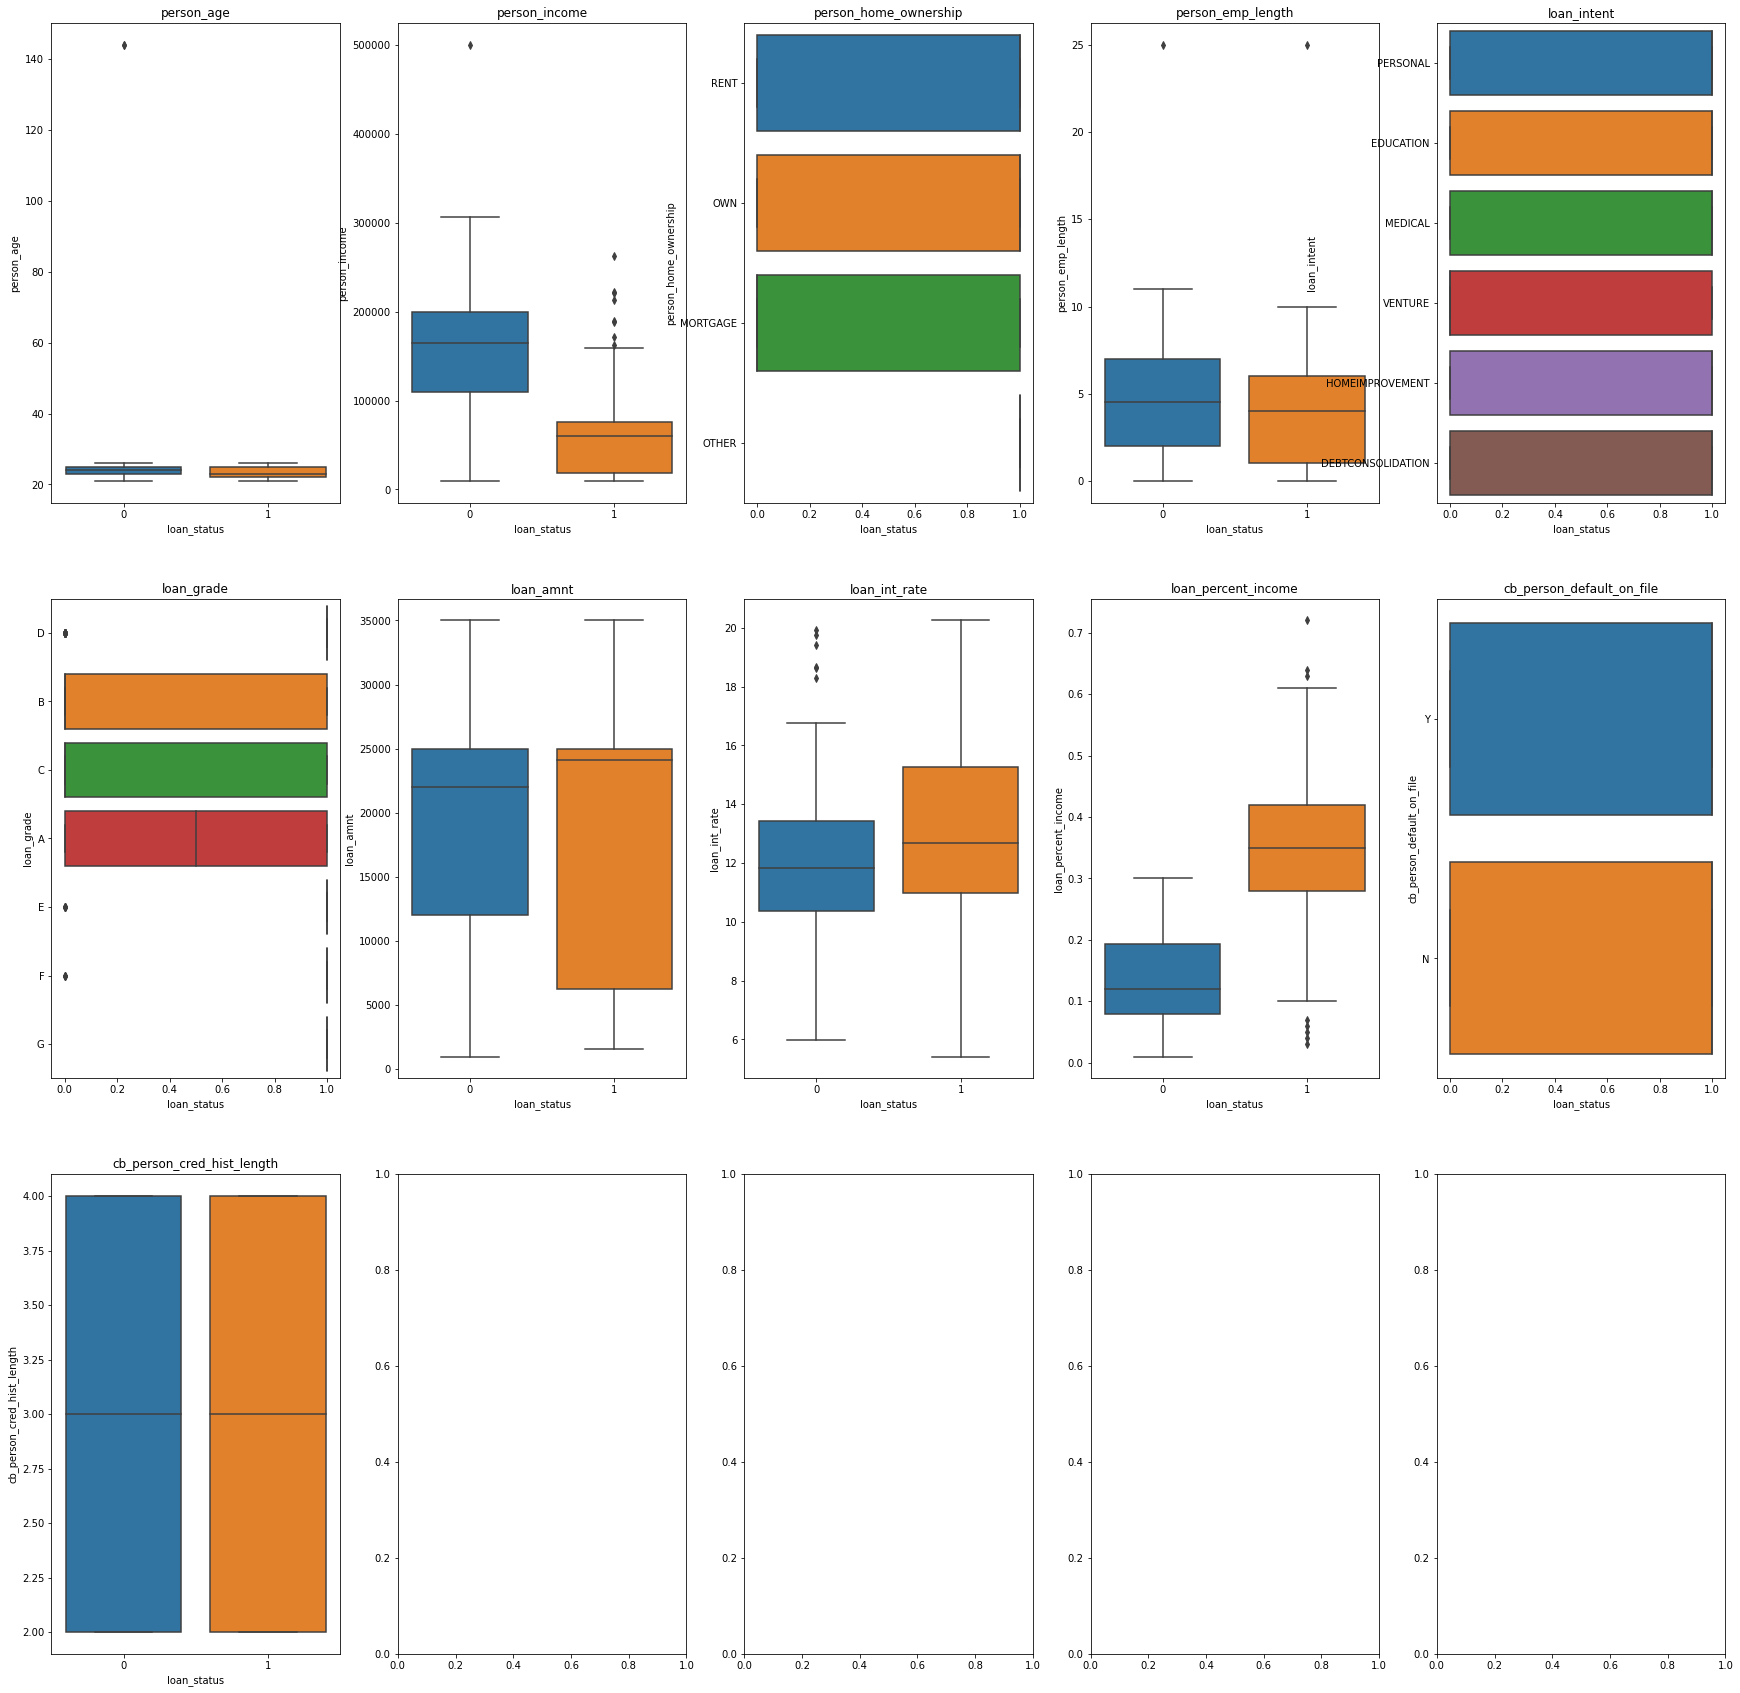

In [182]:
#Visualize differences
feats = df.drop(columns={"loan_status"}).columns
gCols = 5
#gRows = math.ceil( (len(feats) - 1) /gCols )
gRows = math.ceil( len(feats) /gCols )

f, axes = plt.subplots(ncols=gCols, nrows=gRows, figsize=(30,30))
i = 0
q = 0
for column in feats:
    #sns.kdeplot(data=df, x=str(column), hue="Class", ax=axes[q][i])
    sns.boxplot(x="loan_status", y=str(column), data=df, ax=axes[q][i])
    axes[q][i].set_title(str(column))
    i += 1
    if i >= gCols:
        i = 0
        q += 1

Normalizing Data

In [183]:
#Normalize data
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1= scaler.transform(X_test)

In [184]:
from sklearn.metrics import classification_report

In [185]:
#Building Model with Train Set
logit_model = LogisticRegression().fit(X_train1, y_train)

#Predicting the test set
y_pred = logit_model.predict(X_test1)

#For AUC Score(Prob of Being Default)
y_prob = logit_model.predict_proba(X_test1)[:, 1]



#Classification Report
print(classification_report(y_test, y_pred))


#F-1 score is very low.

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        48
           1       0.86      0.93      0.89        54

    accuracy                           0.88       102
   macro avg       0.89      0.88      0.88       102
weighted avg       0.88      0.88      0.88       102



#F-1 score is very low.

In [186]:
"F1:",f1_score(y_test,y_pred)

('F1:', 0.8928571428571429)

In [187]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

c:\Users\shikh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


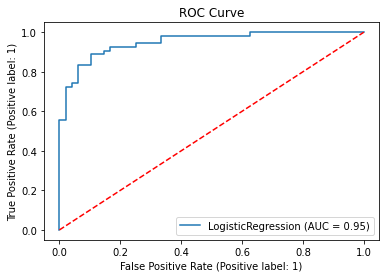

0.9498456790123457

In [188]:
#ROC Curve & ROC AUC Score

# ROC Curve
metrics.plot_roc_curve(logit_model, X_test1, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

metrics.roc_auc_score(y_test, y_prob)

In [189]:
#Model Validation: 5-Fold Cross Validation

y = credit_new2["loan_status"]
X = credit_new2.drop(["loan_status"], axis=1)

#Model
logit = LogisticRegression().fit(X,y)

In [190]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [191]:
cv_logit_acc = cross_val_score(logit, X,y,cv = 10, scoring = "accuracy")
cv_logit_f1 = cross_val_score(logit, X,y,cv = 10, scoring = "f1")
cv_logit_roc = cross_val_score(logit, X,y,cv = 10, scoring = "roc_auc")

In [192]:
print("Accuracy: ",cv_logit_acc.mean())
print(" F-1 Score: ",cv_logit_f1.mean())
print("ROC AUC Score: ",cv_logit_roc.mean())

Accuracy:  0.8426274509803922
 F-1 Score:  0.8736205639556267
ROC AUC Score:  0.9317230183609494


F1-Score is very low.

                                New Model Random Forest

In [193]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [194]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

Resampled dataset shape Counter({1: 235, 0: 232})
F1: 0.9272727272727271
Acc: 0.9215686274509803
Recall: 0.9444444444444444
Precision: 0.9107142857142857


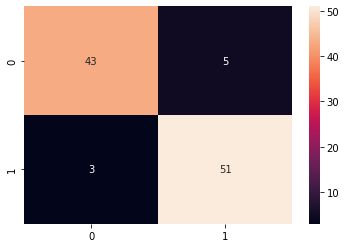

In [195]:
sampler = ADASYN(n_jobs=-1)
X_train5Samp, y_train5Samp = sampler.fit_resample(X_train1, y_train)
print('Resampled dataset shape %s' % Counter(y_train5Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train5_norm = scaler.fit_transform(X_train5Samp)
X_test5_norm = scaler.transform(X_test1)

#Train model
model = RandomForestClassifier(n_jobs=-1).fit(X_train5_norm,y_train5Samp.ravel())
#Make predictions
preds5 = model.predict(X_test5_norm)

#Generate 1/0 results and show results
labels5 = binarize(np.array(preds5).reshape(-1,1), threshold=.5)
conf_matrix5 = confusion_matrix(y_test,labels5)
sns.heatmap(conf_matrix5, annot=True)

print("F1:",f1_score(y_test, labels5))
print("Acc:",accuracy_score(y_test, labels5))
print("Recall:",recall_score(y_test, labels5))
print("Precision:",precision_score(y_test, labels5))

F1: 0.9272727272727271


<AxesSubplot:>

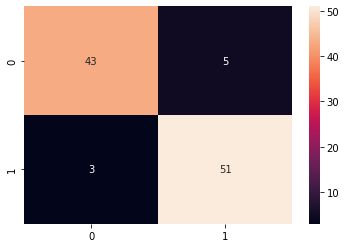

In [196]:
#d_test = pd.read_csv("test.csv")

######################
# Insert whatever you need to do to prep the data here. 
# It might be nothing if you have a big pipeline. 
# Ensure that at the end your data is in two arrays - xtest and ytest
# Ensure the name of your final model is "model"
# Each should contain the ENTIRE x or y dataset in the test data. 
#
# This part should be reusable - any dataset in this format should just run
# and generate predictions and accuracy stats. 
# Please DO NOT do any train-test splitting here. 
#######################

# This should work once you're done, as is. 
# uncomment the stuff below when ready to run.#y_pred
print("F1:",f1_score(y_test,labels5))
conf_matrix = confusion_matrix(y_test, labels5)
sns.heatmap(conf_matrix, annot=True)